In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from datetime import datetime
from pytimeparse.timeparse import timeparse

In [2]:
import ipywidgets as widgets

In [3]:
df = pd.read_csv("workout_data.csv", index_col=("Exercise Name")).dropna(axis=1, how="all")

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df["Volume"] = df["Weight"]*df["Reps"]

In [6]:
df["Max"] = df["Weight"]*(36 / (37 - df["Reps"]))

In [7]:
df["Volume"].sum()

179962.5

In [8]:
nums = df.drop(columns=["Workout Name", "Weight Unit", "Notes"], axis=1)

In [9]:
nums["Workout Duration (minutes)"] = nums["Workout Duration"].apply(lambda x: timeparse(x)/60)

In [10]:
nums = nums.drop("Workout Duration", axis=1, errors="ignore")

In [11]:
nums["Workout Duration (minutes)"].unique()

array([33., 32., 39., 35., 64., 36., 65., 41., 60., 40., 50., 26., 13.,
       30., 52., 37.])

In [34]:
nums["Workout Duration (minutes)"].describe()

count    356.000000
mean      40.907303
std       12.258477
min       13.000000
25%       33.000000
50%       39.000000
75%       50.000000
max       65.000000
Name: Workout Duration (minutes), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75fc1ebb10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75fc1f5190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f75fc1eb790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f75fc1f5850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75fc1f5b90>],
 'means': []}

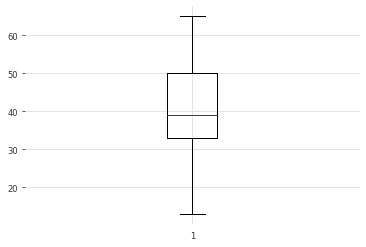

In [33]:
plt.boxplot(nums["Workout Duration (minutes)"])

In [35]:
index = widgets.Dropdown(
    options=sorted(df.index.unique()),
    value=df.index[0],
    description='Excersize:',
    disabled=False,
)

In [36]:
index

Dropdown(description='Excersize:', index=4, options=('Bench Dip', 'Bench Press (Barbell)', 'Bench Press - Clos…

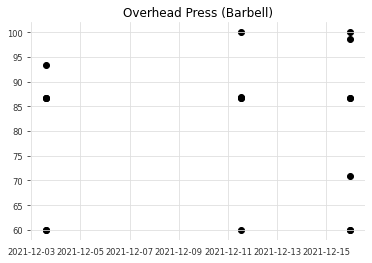

In [61]:
sort = df.loc[index.value].sort_values(by=("Date"))

plt.title(index.value)
plt.scatter(sort["Date"], sort["Max"]) 

In [39]:
from collections import Counter

In [40]:
freqs = Counter(sort["Max"])

In [ ]:
freqs